# Project 2 : House price prediction

In [1]:
import pandas as pd
import numpy as np

In [2]:
housing = pd.read_csv("Housing.csv")

In [3]:
# Data Inspection
housing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 545 entries, 0 to 544
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   price             545 non-null    int64 
 1   area              545 non-null    int64 
 2   bedrooms          545 non-null    int64 
 3   bathrooms         545 non-null    int64 
 4   stories           545 non-null    int64 
 5   mainroad          545 non-null    object
 6   guestroom         545 non-null    object
 7   basement          545 non-null    object
 8   hotwaterheating   545 non-null    object
 9   airconditioning   545 non-null    object
 10  parking           545 non-null    int64 
 11  prefarea          545 non-null    object
 12  furnishingstatus  545 non-null    object
dtypes: int64(6), object(7)
memory usage: 55.5+ KB


In [4]:
housing.sample(5)

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
197,4956000,2800,3,2,2,no,no,yes,no,yes,1,no,semi-furnished
388,3500000,3650,3,1,2,yes,no,no,no,no,0,no,unfurnished
508,2590000,4400,2,1,1,yes,no,no,no,no,0,no,unfurnished
221,4767000,3420,4,2,2,yes,no,no,no,no,0,no,semi-furnished
293,4200000,4410,2,1,1,no,no,no,no,no,1,no,unfurnished


In [5]:
housing.head(10)

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished
5,10850000,7500,3,3,1,yes,no,yes,no,yes,2,yes,semi-furnished
6,10150000,8580,4,3,4,yes,no,no,no,yes,2,yes,semi-furnished
7,10150000,16200,5,3,2,yes,no,no,no,no,0,no,unfurnished
8,9870000,8100,4,1,2,yes,yes,yes,no,yes,2,yes,furnished
9,9800000,5750,3,2,4,yes,yes,no,no,yes,1,yes,unfurnished


In [6]:
housing.shape

(545, 13)

In [7]:
housing.describe()

,price,area,bedrooms,bathrooms,stories,parking
count,5.450000e+02,545.000000,545.000000,545.000000,545.000000,545.000000
mean,4.766729e+06,5150.541284,2.965138,1.286239,1.805505,0.693578
std,1.870440e+06,2170.141023,0.738064,0.502470,0.867492,0.861586
min,1.750000e+06,1650.000000,1.000000,1.000000,1.000000,0.000000
25%,3.430000e+06,3600.000000,2.000000,1.000000,1.000000,0.000000
50%,4.340000e+06,4600.000000,3.000000,1.000000,2.000000,0.000000
75%,5.740000e+06,6360.000000,3.000000,2.000000,2.000000,1.000000
max,1.330000e+07,16200.000000,6.000000,4.000000,4.000000,3.000000


In [8]:
# Data Cleaning
# Checking Null values
housing.isnull().sum()*100/housing.shape[0]

price               0.0
area                0.0
bedrooms            0.0
bathrooms           0.0
stories             0.0
mainroad            0.0
guestroom           0.0
basement            0.0
hotwaterheating     0.0
airconditioning     0.0
parking             0.0
prefarea            0.0
furnishingstatus    0.0
dtype: float64

In [9]:
from ydata_profiling import ProfileReport
Profile = ProfileReport(housing,title = "Housing_Data_Analysis")
Profile.to_file("output.html")

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

In [10]:
%matplotlib inline

array([[<Axes: title={'center': 'price'}>,
        <Axes: title={'center': 'area'}>],
       [<Axes: title={'center': 'bedrooms'}>,
        <Axes: title={'center': 'bathrooms'}>],
       [<Axes: title={'center': 'stories'}>,
        <Axes: title={'center': 'parking'}>]], dtype=object)

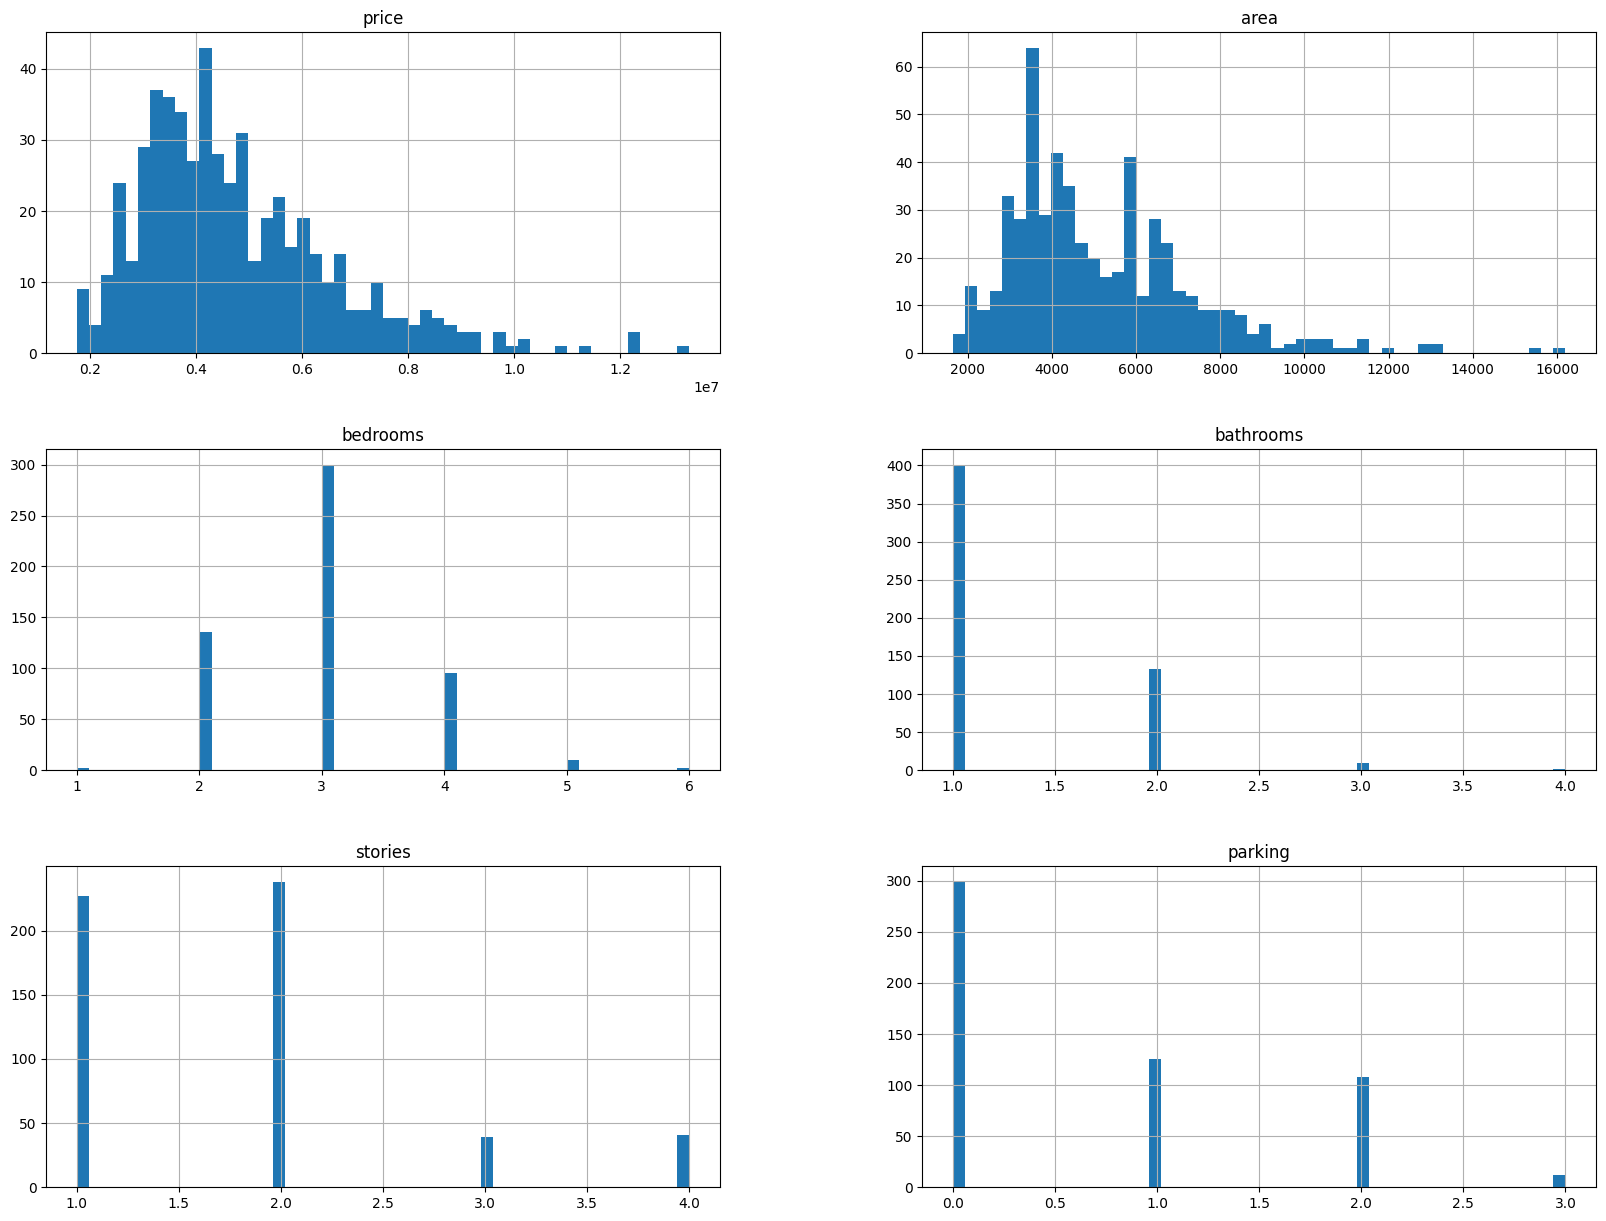

In [11]:
#For Histogram  (Data Visualisation) 
import matplotlib.pyplot as plt
import seaborn as sns
housing.hist(bins=50, figsize=(20,15))

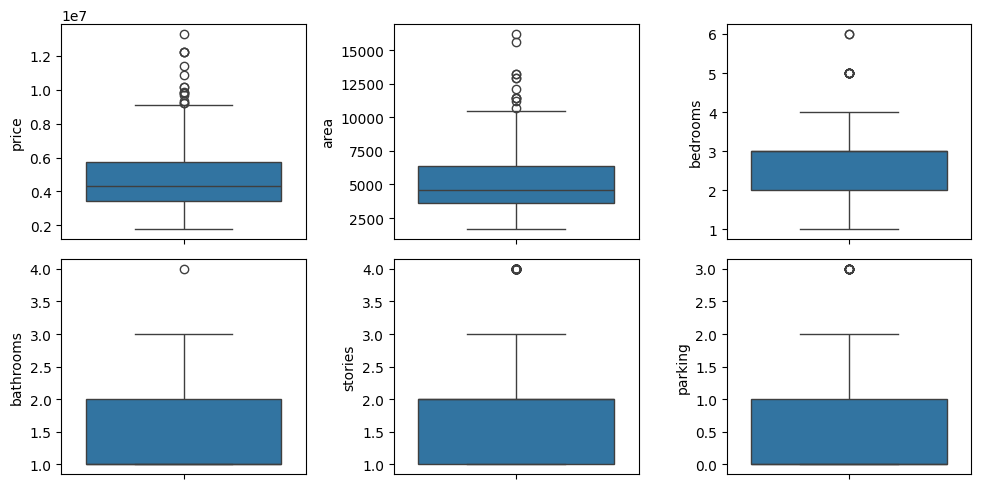

In [12]:
# Outlier Analysis
fig, axs = plt.subplots(2,3, figsize = (10,5))
plt1 = sns.boxplot(housing['price'], ax = axs[0,0])
plt2 = sns.boxplot(housing['area'], ax = axs[0,1])
plt3 = sns.boxplot(housing['bedrooms'], ax = axs[0,2])
plt1 = sns.boxplot(housing['bathrooms'], ax = axs[1,0])
plt2 = sns.boxplot(housing['stories'], ax = axs[1,1])
plt3 = sns.boxplot(housing['parking'], ax = axs[1,2])
plt.tight_layout()

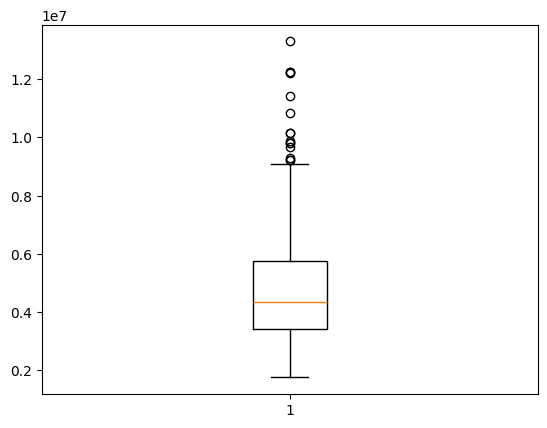

In [13]:
# outlier treatment for price
plt.boxplot(housing.price)
Q1 = housing.price.quantile(0.25)
Q3 = housing.price.quantile(0.75)
IQR = Q3 - Q1
housing = housing[(housing.price >= Q1 - 1.5*IQR) & (housing.price <= Q3 + 1.5*IQR)]

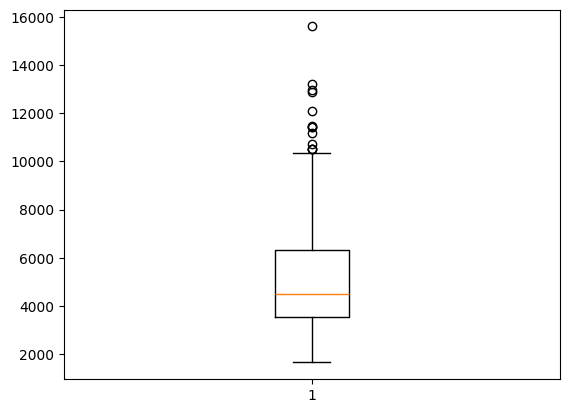

In [14]:
# For area
plt.boxplot(housing.area)
Q1 = housing.area.quantile(0.25)
Q3 = housing.area.quantile(0.75)
IQR = Q3 - Q1
housing = housing[(housing.area >= Q1 - 1.5*IQR) & (housing.area <= Q3 + 1.5*IQR)]

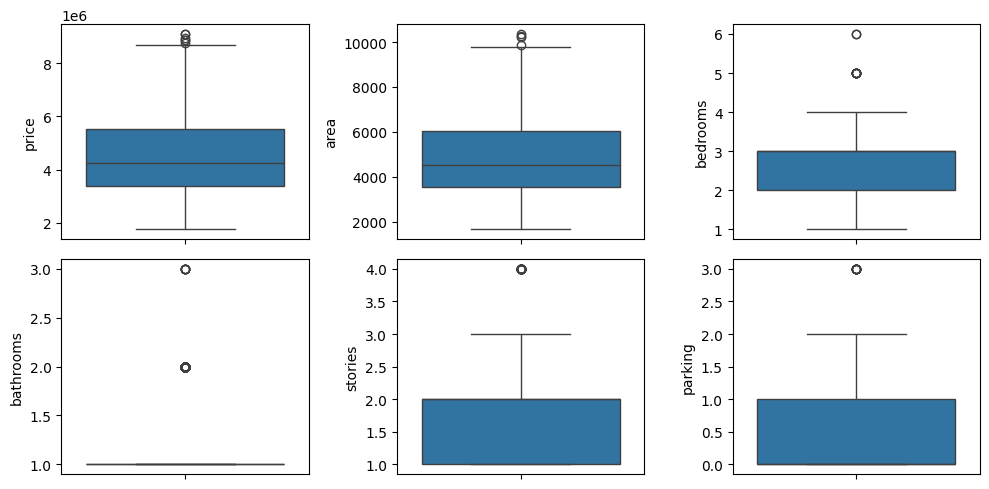

In [15]:
# Outlier Analysis
fig, axs = plt.subplots(2,3, figsize = (10,5))
plt1 = sns.boxplot(housing['price'], ax = axs[0,0])
plt2 = sns.boxplot(housing['area'], ax = axs[0,1])
plt3 = sns.boxplot(housing['bedrooms'], ax = axs[0,2])
plt1 = sns.boxplot(housing['bathrooms'], ax = axs[1,0])
plt2 = sns.boxplot(housing['stories'], ax = axs[1,1])
plt3 = sns.boxplot(housing['parking'], ax = axs[1,2])

plt.tight_layout()

In [ ]:
# Visualising Numeric variables
sns.pairplot(housing)
plt.show()

In [ ]:
plt.figure(figsize=(20, 12))
plt.subplot(2,3,1)
sns.boxplot(x = 'mainroad', y = 'price', data = housing)
plt.subplot(2,3,2)
sns.boxplot(x = 'guestroom', y = 'price', data = housing)
plt.subplot(2,3,3)
sns.boxplot(x = 'basement', y = 'price', data = housing)
plt.subplot(2,3,4)
sns.boxplot(x = 'hotwaterheating', y = 'price', data = housing)
plt.subplot(2,3,5)
sns.boxplot(x = 'airconditioning', y = 'price', data = housing)
plt.subplot(2,3,6)
sns.boxplot(x = 'furnishingstatus', y = 'price', data = housing)
plt.show()

In [ ]:
plt.figure(figsize = (10, 5))
sns.boxplot(x = 'furnishingstatus', y = 'price', hue = 'airconditioning', data = housing)
plt.show()

In [ ]:
housing.head()

In [ ]:
varlist =  ['mainroad', 'guestroom', 'basement', 'hotwaterheating', 'airconditioning', 'prefarea']

def binary_map(x):
    return x.map({'yes': 1, "no": 0})
housing[varlist] = housing[varlist].apply(binary_map)

In [ ]:
housing.columns

In [ ]:
status = pd.get_dummies(housing['furnishingstatus'], dtype= int)
housing = pd.concat([housing, status], axis = 1)
housing = housing.drop(columns = "furnishingstatus",axis = 1)

In [ ]:
status.head(4)

# Splitting into Train & Test set

In [ ]:
housing.head()

In [ ]:
from sklearn.preprocessing import MinMaxScaler

In [ ]:
scaler = MinMaxScaler()

In [ ]:
from sklearn.model_selection import train_test_split
np.random.seed(0)
df_train, df_test = train_test_split(housing, train_size = 0.7, test_size = 0.3, random_state = 100)

In [ ]:
# Applying scaler() to all the columns except the 'yes-no' and dummy variables
num_vars = ['area', 'bedrooms', 'bathrooms', 'stories', 'parking','price']

df_train[num_vars] = scaler.fit_transform(df_train[num_vars])

In [ ]:
df_train.head()

In [ ]:
df_train.describe()

In [ ]:
# Checking the correlation coefficients to see which variables are highly correlated
plt.figure(figsize = (16, 10))
sns.heatmap(df_train.corr(), annot = True, cmap="YlGnBu")
plt.show()

In [ ]:
y_train = df_train.pop('price')
X_train = df_train

In [ ]:
# Importing Recursive feature elimination (RFE) and LinearRegression
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression
lm = LinearRegression()
lm.fit(X_train, y_train)

In [ ]:
rfe = RFE(estimator=lm, n_features_to_select=6)
rfe = rfe.fit(X_train, y_train)
list(zip(X_train.columns,rfe.support_,rfe.ranking_))

In [ ]:
list(zip(X_train.columns,rfe.support_,rfe.ranking_))

In [ ]:
col = X_train.columns[rfe.support_]
col

In [ ]:
X_train.columns[~rfe.support_]

In [ ]:
X_train_rfe = X_train[col]
import statsmodels.api as sm  
X_train_rfe = sm.add_constant(X_train_rfe)
lm = sm.OLS(y_train,X_train_rfe).fit()
print(lm.summary())

In [ ]:
# Calculate the VIFs for the model
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif = pd.DataFrame()
X = X_train_rfe
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

In [ ]:
# Residual Analysis of the train data
y_train_price = lm.predict(X_train_rfe)
res = (y_train_price - y_train)
# Importing the required libraries for plots :
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
# Plot the histogram of the error terms
fig = plt.figure()
sns.histplot((y_train - y_train_price), bins = 20)
fig.suptitle('Error Terms', fontsize = 20)
plt.xlabel('Errors', fontsize = 18)

In [ ]:
plt.scatter(y_train,res)
plt.show()

In [ ]:
# Model Evaluation
num_vars = ['area','stories', 'bathrooms', 'airconditioning', 'prefarea','parking','price']
df_test[num_vars] = scaler.fit_transform(df_test[num_vars])
# Dividing into X_test and y_test
y_test = df_test.pop('price')
X_test = df_test
X_test = sm.add_constant(X_test)

In [ ]:
X_test_rfe = X_test[X_train_rfe.columns]
# Making predictions
y_pred = lm.predict(X_test_rfe)
from sklearn.metrics import r2_score 
r2_score(y_test, y_pred)

In [ ]:
# Plotting y_test and y_pred to understand the spread.
fig = plt.figure()
plt.scatter(y_test,y_pred)
fig.suptitle('y_test vs y_pred', fontsize=20)
plt.xlabel('y_test', fontsize=18)
plt.ylabel('y_pred', fontsize=16)

 The equation of our best fitted line is:

price=(0.35×area)+(0.20×bathrooms)+(0.19×stories)+(0.10×airconditioning)+(0.10×parking)+(0.11×prefarea)